PHASE 2 : DATA EXPLORATION (EDA)
1. Plotting graphs.
2. Noting observations.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# display settings
pd.set_option("display.max_columns", None)

# load dataset
df = pd.read_csv("../data/raw/crop_yield.csv")

df.head()


,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,Arecanut,1997,Whole Year,Assam,73814.0,56708,2051.4,7024878.38,22882.34,0.796087
1,Arhar/Tur,1997,Kharif,Assam,6637.0,4685,2051.4,631643.29,2057.47,0.710435
2,Castor seed,1997,Kharif,Assam,796.0,22,2051.4,75755.32,246.76,0.238333
3,Coconut,1997,Whole Year,Assam,19656.0,126905000,2051.4,1870661.52,6093.36,5238.051739
4,Cotton(lint),1997,Kharif,Assam,1739.0,794,2051.4,165500.63,539.09,0.420909


1. data loads without error.
2. columns match what we listed.

In [2]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19689 entries, 0 to 19688
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Crop             19689 non-null  object 
 1   Crop_Year        19689 non-null  int64  
 2   Season           19689 non-null  object 
 3   State            19689 non-null  object 
 4   Area             19689 non-null  float64
 5   Production       19689 non-null  int64  
 6   Annual_Rainfall  19689 non-null  float64
 7   Fertilizer       19689 non-null  float64
 8   Pesticide        19689 non-null  float64
 9   Yield            19689 non-null  float64
dtypes: float64(5), int64(2), object(3)
memory usage: 1.5+ MB


In [3]:
df.shape

(19689, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19689 entries, 0 to 19688
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Crop             19689 non-null  object 
 1   Crop_Year        19689 non-null  int64  
 2   Season           19689 non-null  object 
 3   State            19689 non-null  object 
 4   Area             19689 non-null  float64
 5   Production       19689 non-null  int64  
 6   Annual_Rainfall  19689 non-null  float64
 7   Fertilizer       19689 non-null  float64
 8   Pesticide        19689 non-null  float64
 9   Yield            19689 non-null  float64
dtypes: float64(5), int64(2), object(3)
memory usage: 1.5+ MB


In [5]:
df.describe()


,Crop_Year,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
count,19689.000000,1.968900e+04,1.968900e+04,19689.000000,1.968900e+04,1.968900e+04,19689.000000
mean,2009.127584,1.799266e+05,1.643594e+07,1437.755177,2.410331e+07,4.884835e+04,79.954009
std,6.498099,7.328287e+05,2.630568e+08,816.909589,9.494600e+07,2.132874e+05,878.306193
min,1997.000000,5.000000e-01,0.000000e+00,301.300000,5.417000e+01,9.000000e-02,0.000000
25%,2004.000000,1.390000e+03,1.393000e+03,940.700000,1.880146e+05,3.567000e+02,0.600000
50%,2010.000000,9.317000e+03,1.380400e+04,1247.600000,1.234957e+06,2.421900e+03,1.030000
75%,2015.000000,7.511200e+04,1.227180e+05,1643.700000,1.000385e+07,2.004170e+04,2.388889
max,2020.000000,5.080810e+07,6.326000e+09,6552.700000,4.835407e+09,1.575051e+07,21105.000000


1. number of rows and columns.
2. which columns are categorical.
3. which are numerical.
4. any suspicious data types.

In [6]:
df.isnull().sum()

Crop               0
Crop_Year          0
Season             0
State              0
Area               0
Production         0
Annual_Rainfall    0
Fertilizer         0
Pesticide          0
Yield              0
dtype: int64

Checking missing values --> none found --> Excellent!

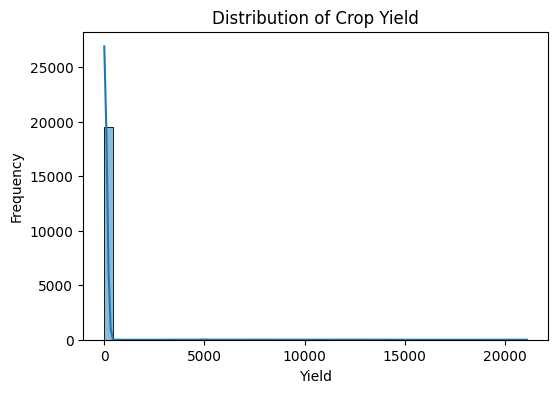

In [7]:
df["Yield"].describe()
plt.figure(figsize=(6,4))
sns.histplot(df["Yield"], bins=50, kde=True)
plt.title("Distribution of Crop Yield")
plt.xlabel("Yield")
plt.ylabel("Frequency")
plt.show()



1. Target variable- Yield
2. graph tells us if yield is skewed, are there extreme values?, and does it look realistic?
3. Yield is right skewed with long tail and extreme outliers. (mean>>median --> from df.describe() ; max is extremely large ~ 21105 and median(50%)~1.03)

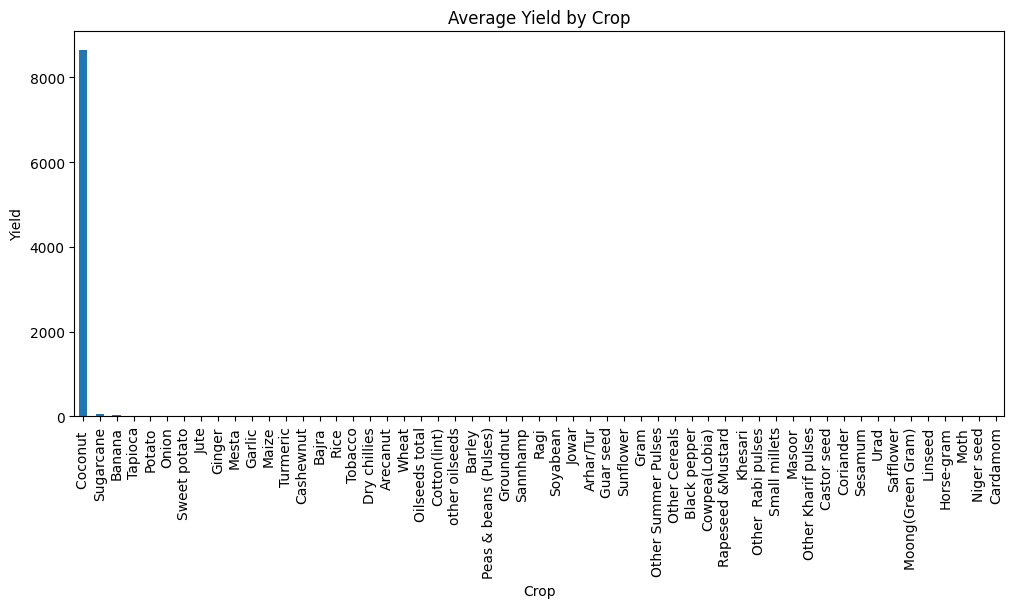

In [8]:
plt.figure(figsize=(12,5))
df.groupby("Crop")["Yield"].mean().sort_values(ascending=False).plot(kind="bar")
plt.title("Average Yield by Crop")
plt.ylabel("Yield")
plt.show()


Crop wise yield comparision.

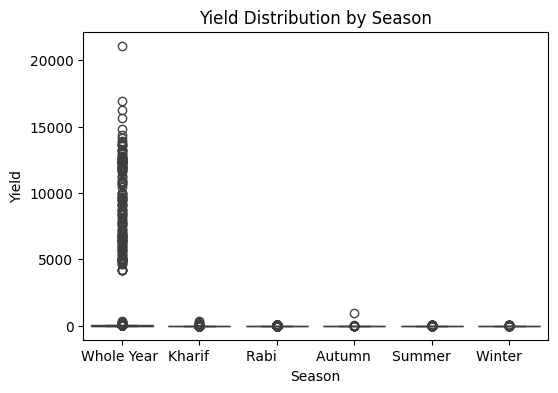

In [9]:
plt.figure(figsize=(6,4))
sns.boxplot(x="Season", y="Yield", data=df)
plt.title("Yield Distribution by Season")
plt.show()


Season-wise yield. Observation ideas
1. which season gives higher yield?
2. is variability high?

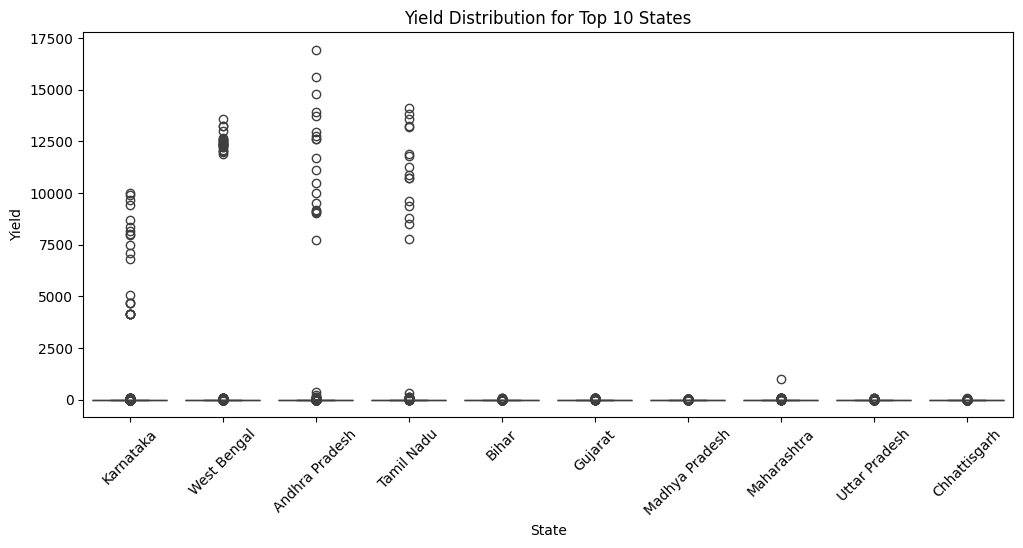

In [10]:
top_states = df["State"].value_counts().head(10).index

plt.figure(figsize=(12,5))
sns.boxplot(
    x="State", 
    y="Yield", 
    data=df[df["State"].isin(top_states)]
)
plt.xticks(rotation=45)
plt.title("Yield Distribution for Top 10 States")
plt.show()


State-wise yield (top states only)

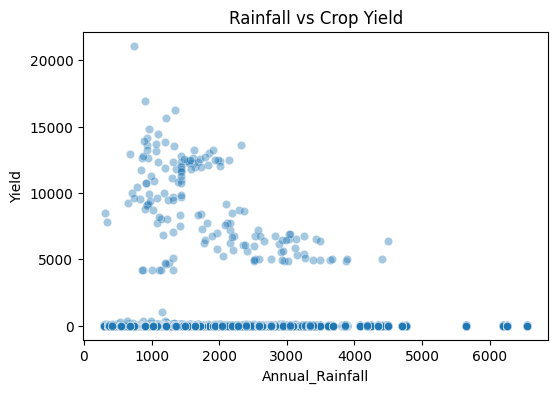

In [11]:
plt.figure(figsize=(6,4))
sns.scatterplot(
    x="Annual_Rainfall", 
    y="Yield", 
    data=df,
    alpha=0.4
)
plt.title("Rainfall vs Crop Yield")
plt.show()


Rainfall vs Yield relationship

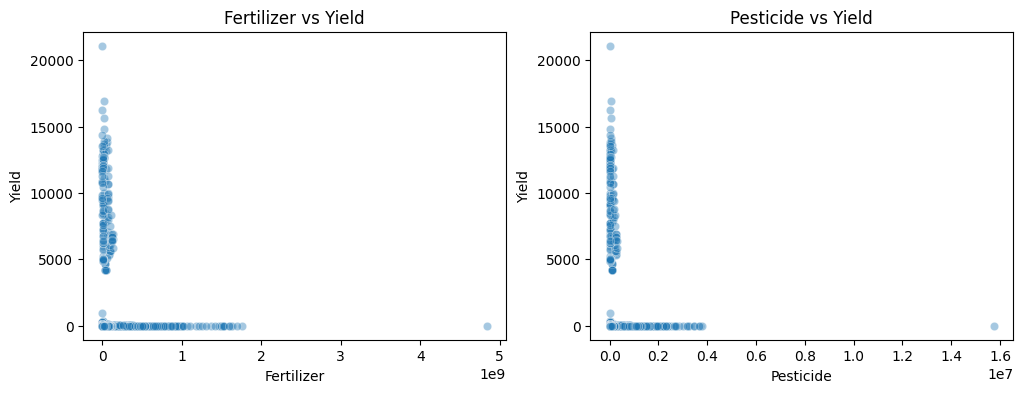

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(12,4))

sns.scatterplot(
    x="Fertilizer", y="Yield", data=df, ax=axes[0], alpha=0.4
)
axes[0].set_title("Fertilizer vs Yield")

sns.scatterplot(
    x="Pesticide", y="Yield", data=df, ax=axes[1], alpha=0.4
)
axes[1].set_title("Pesticide vs Yield")

plt.show()


Fertilizer and Pesticide impact

In [13]:
df["Crop"].value_counts().head(10)


Crop
Rice                 1197
Maize                 975
Moong(Green Gram)     740
Urad                  733
Groundnut             725
Sesamum               685
Potato                628
Sugarcane             605
Wheat                 545
Rapeseed &Mustard     528
Name: count, dtype: int64

Crop frequency --> for reccomendation task. Used to check if some crops are overrepresentated --> impacts classification.

CONCLUSION: Rainfall, fertilizer, and pesticide usage show a weak but positive relationship with crop yield. However, the relationship is noisy, indicating that yield is influenced by multiple interacting factors rather than a single variable.